In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
from dataclasses import dataclass, field, fields
import pack_cuda
import pack_vis
import pack_cost
import copy
import time
from IPython.display import HTML, display, clear_output
pack_cuda.USE_FLOAT32 = True
#pack_cuda._ensure_initialized()


local


In [2]:
%load_ext pyinstrument

In [ ]:
#%%pyinstrument
#kgs.profiling=True
# %matplotlib widget
#kgs.enable_module_profiling(kgs)
import pack_ga3
import pack_runner
importlib.reload(pack_ga3)
fastMode = False
kgs.debugging_mode = 2

for seed in range(100):

    runner = pack_ga3.baseline_symmetry_180()

    #ref_sol = kgs.dill_load(kgs.temp_dir + '/controller_runs/done/ga_N68_seed507_done.pickle')
    #runner.ga.ga_base.initializer.ref_sol = kgs.create_tiled_solution('Perfect dimer', 15,make_symmetric=True, axis1_offset=0., axis2_offset=0.5)
    #runner.ga.ga_base.initializer.ref_sol.xyt[:,:,:2] += cp.array([0.2,0.2])
    runner.ga.ga_base.initializer.ref_sol_crystal_type = 'Perfect dimer'
    runner.ga.ga_base.initializer.ref_sol_axis1_offset = 0.
    runner.ga.ga_base.initializer.ref_sol_axis2_offset = 0.5
    runner.ga.ga_base.initializer.new_tree_placer = True
    runner.ga.ga_base.initializer.base_solution.edge_spacer = kgs.EdgeSpacerBasic(dist_x = 0.5, dist_y = 0.5)
    runner.ga.ga_base.use_new_ref_score = True
    #runner.ga.ga_base.initializer.ref_rotate = None
    #runner.ga.ga_base.initializer.ref_sol.canonicalize()
    #runner.ga.ga_base.initializer.ref_N_scaling = 0.5
    runner.ga.target_score = 0.34

    runner.ga.ga_base.N_trees_to_do = 68
    runner.n_generations = 1000
    #runner.ga.ga_base.reset_check_generations = 3
    runner.ga.N = 16
    #runner.ga.allow_reset_ratio = 1.
    runner.diagnostic_plot = False
    runner.seed = seed
    runner.plot_every = 10
    #runner.filter_before_rough = 1.

    runner.run()
    runner_temp = copy.deepcopy(runner)
    runner_temp.ga.ga_base.initializer.fixed_h = cp.array([np.sqrt(0.37*runner_temp.ga.ga_base.N_trees_to_do),0,0],dtype=kgs.dtype_cp)
    import pack_vis_sol
    sol = runner_temp.ga.ga_base.initializer.initialize_population(10,runner_temp.ga.ga_base.N_trees_to_do)
    for i in range(10):
        pack_vis_sol.pack_vis_sol(sol.genotype, i)
        pack_vis_sol.pack_vis_sol(sol.phenotype, i)

    runner.run()

29515731 0.0 0.5
init CUDA
Detected GPU compute capability: 8.9 (arch=sm_89)
GPU max threads per block: 1024
=== Compiling kernel variant: crystal ===
Defines: ENABLE_CRYSTAL_AXES, ENABLE_OVERLAP_AREA, ENABLE_SEPARATION
Command: /usr/local/cuda/bin/nvcc -O3 -use_fast_math --extra-device-vectorization --ptxas-options=-v,--warn-on-spills -arch=sm_89 -DENABLE_CRYSTAL_AXES -DENABLE_OVERLAP_AREA -DENABLE_SEPARATION -cubin /mnt/d//packing/temp/pack_cuda_saved.cu -o /mnt/d//packing/temp/pack_cuda_crystal.cubin
ptxas info    : 0 bytes gmem, 1172 bytes cmem[3]
ptxas info    : Compiling entry function 'multi_boundary_distance_list_total' for 'sm_89'
ptxas info    : Function properties for multi_boundary_distance_list_total
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 36 registers, used 1 barriers, 404 bytes cmem[0], 16 bytes cmem[2]
ptxas info    : Compile time = 9.732 ms
ptxas info    : Compiling entry function 'multi_boundary_list_total' for 'sm_89'
p

/mnt/d/packing/code/analysis/../core/pack_dynamics.py:61: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/../core/pack_dynamics.py:93: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


init LAP CUDA
Detected GPU compute capability: 8.9 (arch=sm_89)
GPU max threads per block: 1024
=== Compiling LAP kernels ===
Command: /usr/local/cuda/bin/nvcc -O3 -use_fast_math --extra-device-vectorization --ptxas-options=-v,--warn-on-spills -arch=sm_89 -cubin /mnt/d//packing/temp/lap_batch_saved.cu -o /mnt/d//packing/temp/lap_batch.cubin
ptxas info    : 0 bytes gmem
ptxas info    : Compiling entry function 'diversity_shortcut_kernel' for 'sm_89'
ptxas info    : Function properties for diversity_shortcut_kernel
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 29 registers, used 1 barriers, 400 bytes cmem[0]
ptxas info    : Compile time = 9.709 ms
ptxas info    : Compiling entry function 'compute_costs' for 'sm_89'
ptxas info    : Function properties for compute_costs
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 29 registers, used 0 barriers, 384 bytes cmem[0]
ptxas info    : Compile time = 3.140 ms
ptxa

In [ ]:
#kgs.packings

In [ ]:
# import pack_vis_sol
# for i in range(sol.phenotype.N_solutions):
#     #_,ax=plt.subplots()
#     runner_temp.ga.ga_base.initializer.ref_sol = kgs.create_tiled_solution('Perfect dimer', 15,make_symmetric=True, axis1_offset=0.0, axis2_offset=0.5)
#     xx=copy.deepcopy(runner_temp.ga.ga_base.initializer.ref_sol)
#     #xx.xyt[:,:,1] *= -1
#     #xx.xyt[:,:,2] += np.pi
#     #xx.rotate(cp.array([np.pi/20]))
#     xx.canonicalize()
#     #xx.xyt[:,:,:2] += cp.array([0.2,0.2])
#     #pack_vis_sol.pack_vis_sol(xx, solution_idx=i,ax=ax,alpha=0.5)
#     _,ax=plt.subplots()
#     pack_vis_sol.pack_vis_sol(xx, solution_idx=i,ax=ax,alpha=0.5)
#     #_,ax=plt.subplots()
#     x = copy.deepcopy(ref_sol.ga.champions[0].genotype)
#     x.rotate(cp.array([np.pi/2]))
#     pack_vis_sol.pack_vis_sol(x, solution_idx=0,ax=ax,alpha=0.5)
    
    

Before optimization:  0.23115681111812592 5.0798778829630464e-05 4.8073487
After optimization:  0.22970950603485107 0.0004854997678194195 4.7877345
After optimization:  0.230217844247818 0.0001228288165293634 4.796822
After optimization:  0.23057745397090912 3.7085628719069064e-05 4.801462
After optimization:  0.23083588480949402 9.213972589350305e-06 4.8044424
After optimization:  0.23097346723079681 2.5033530164364493e-06 4.805944
After optimization:  0.23104950785636902 6.484440291387727e-07 4.806754
After optimization:  0.2310894876718521 1.6726200158245774e-07 4.807175
After optimization:  0.23111110925674438 4.1807062700627284e-08 4.807401
After optimization:  0.23111586272716522 2.7307804018050774e-08 4.807451
After optimization:  0.23112627863883972 8.105798698920808e-09 4.8075595
After optimization:  0.23112978041172028 3.419351468636478e-09 4.8075957
After optimization:  0.2311321347951889 1.5883206971878394e-09 4.8076205
After optimization:  0.23113369941711426 8.18368262045

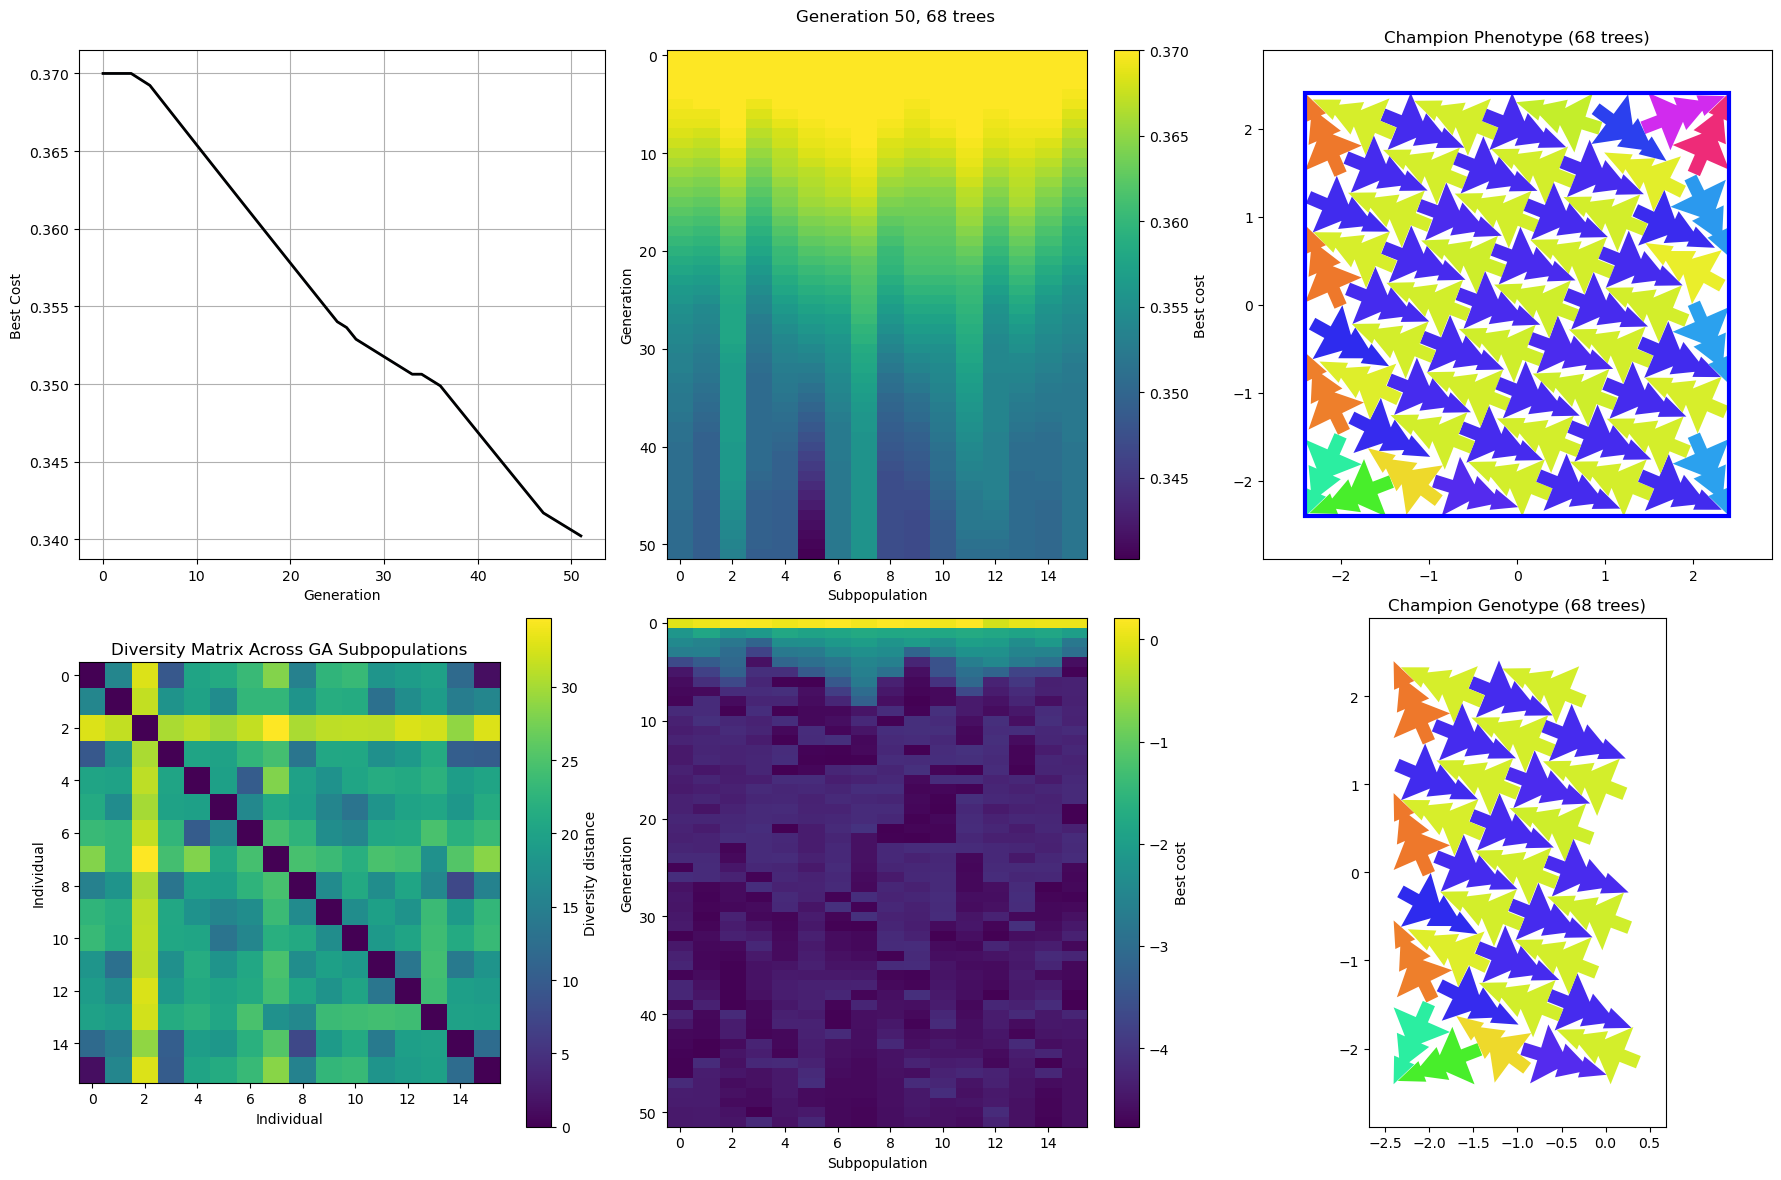

In [ ]:
runner.run()